In [1]:
import numpy as np
import matplotlib.pyplot as plt

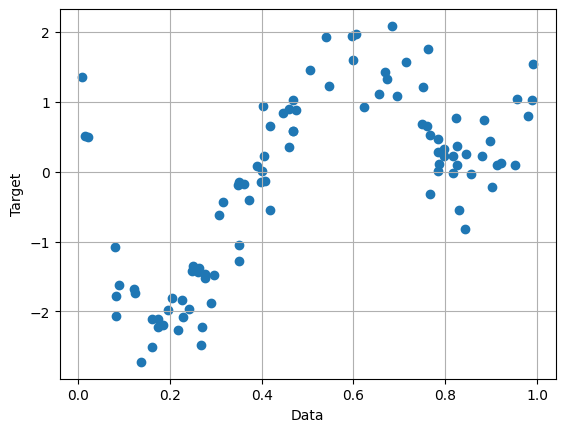

In [2]:
#データ数
n = 100
#データを生成するための関数の定義
def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z

data = np.random.rand(n).astype(np.float32)
data = np.sort(data) #データを小さい順に並び替え
target = true_func(data) #データに対応する正解データ

#ノイズを加える
target = target + 0.5 * np.random.randn(n)

#作成したデータをプロット
plt.scatter(data, target)
plt.ylabel('Target')
plt.xlabel('Data')
plt.grid()
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

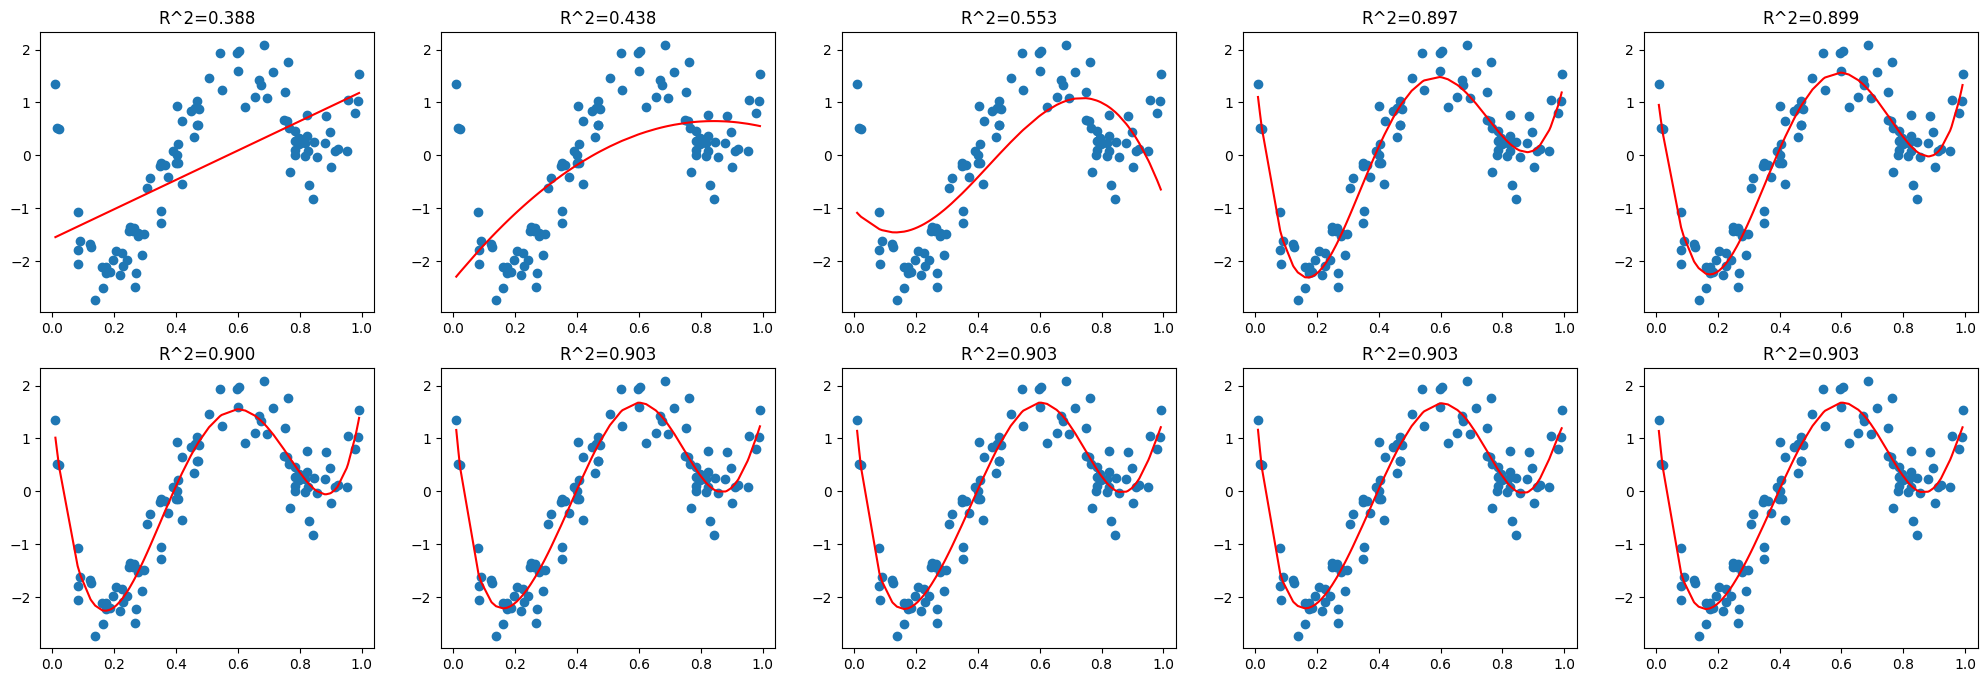

In [11]:
# データとターゲットをモデルに適した形状に変換する
data = data.reshape(-1,1)
target = target.reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)

  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='red') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()